In [154]:
pip install pandas


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [155]:
pip install matplotlib


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [156]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [157]:
#imporing the datasets in week2 file
cab = pd.read_csv('Cab_Data.csv')
city = pd.read_csv('City.csv')
customer_id = pd.read_csv('Customer_ID.csv')
transaction_id = pd.read_csv('Transaction_ID.csv')

In [158]:
#get the shape of the datasets
cab.shape, city.shape, customer_id.shape, transaction_id.shape
#shape of the datasets 
print("Cab Data = ", cab.shape)
print("City Data = ", city.shape)
print("Customer Data = ", customer_id.shape)
print("Transaction Data = ", transaction_id.shape)

#dropping the duplicates
cab.drop_duplicates, city.drop_duplicates, customer_id.drop_duplicates, transaction_id.drop_duplicates

#shape of the datasets after dropping the duplicates
print("Cab Data without duplicates = ", cab.shape)
print("City Data without duplicates = ", city.shape)
print("Customer Data without duplicates = ", customer_id.shape)
print("Transaction Data without duplicates = ", transaction_id.shape)


cab.isnull().sum()
city.isnull().sum()
customer_id.isnull().sum()
transaction_id.isnull().sum()
#print for NA values and missing values
print("Cab data null values = ",cab.isnull().sum())
print("City data null values = ",city.isnull().sum())
print("Customer data null values = ",customer_id.isnull().sum())
print("Transaction data null values = ",transaction_id.isnull().sum())

#Conclusion : There are no missing values in the datasets and no duplicates in the datasets




Cab Data =  (359392, 7)
City Data =  (20, 3)
Customer Data =  (49171, 4)
Transaction Data =  (440098, 3)
Cab Data without duplicates =  (359392, 7)
City Data without duplicates =  (20, 3)
Customer Data without duplicates =  (49171, 4)
Transaction Data without duplicates =  (440098, 3)
Cab data null values =  Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64
City data null values =  City          0
Population    0
Users         0
dtype: int64
Customer data null values =  Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64
Transaction data null values =  Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64


In [159]:
pip install seaborn


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [160]:
from datetime import datetime, timedelta
def to_date_format(n):
    if pd.notna(n):
        date_str = (datetime(1900, 1, 1) + timedelta(days=int(n))).strftime("%d-%m-%Y")
        date_date = datetime.strptime(date_str, "%d-%m-%Y")
        return date_date
    else:
        return pd.NaT

In [161]:
cab['Date of Travel'] = cab['Date of Travel'].apply(lambda x:to_date_format(x))

In [162]:
print(cab['Date of Travel'])

0        2016-01-10
1        2016-01-08
2        2016-01-04
3        2016-01-09
4        2016-01-05
            ...    
359387   2018-01-10
359388   2018-01-06
359389   2018-01-07
359390   2018-01-07
359391   2018-01-04
Name: Date of Travel, Length: 359392, dtype: datetime64[ns]


In [175]:
#merge the datasets and create a new dataset
#after merging the datasets, compare different paratmeters of the different features to 
#draw conclusions and make decisions for the company

#merging the datasets based on foreign keys
#merging cab and transaction datasets
cab_transaction = pd.merge(cab, transaction_id, on='Transaction ID')
cab_transaction.head()

#merging cab_transaction and customer_id datasets
cab_transaction_customer = pd.merge(cab_transaction, customer_id, on='Customer ID')
cab_transaction_customer.head()

#merging cab_transaction_customer and city datasets
cab_transaction_customer_city = pd.merge(cab_transaction_customer, city, on='City')
cab_transaction_customer_city.head()

#shape of the new dataset
#print(cab_transaction_customer_city)
print("Shape of the new dataset = ", cab_transaction_customer_city.shape)

cab_transaction_customer_city

Shape of the new dataset =  (359392, 14)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,2018-07-23,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,2018-11-25,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,2018-04-23,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-05,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,"418,859","127,001"
359388,10319775,2018-04-15,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,"418,859","127,001"
359389,10347676,2018-07-08,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,"418,859","127,001"
359390,10358624,2018-08-04,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,"418,859","127,001"


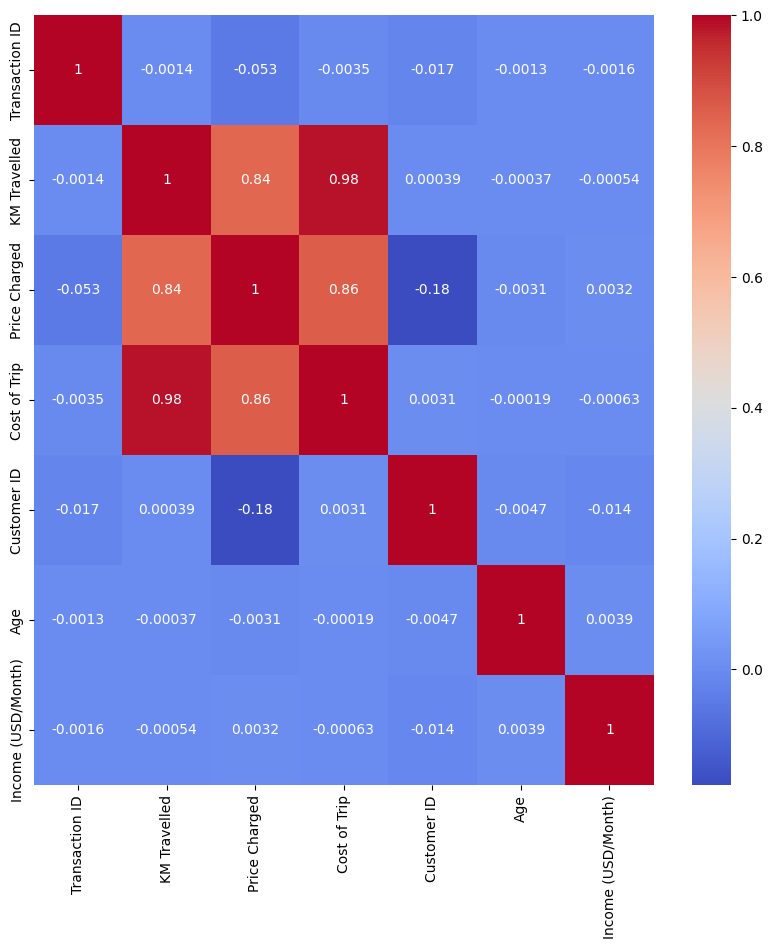

In [176]:
#plot correlation heat map
import seaborn as sns
numeric_columns = cab_transaction_customer_city.select_dtypes(include=['float64', 'int64'])

# Plotting the correlation heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.show()


#Conclusion : There is a strong correlation between the following features
#1. Price Charged and Cost of Trip
#2. Price Charged and Customer ID
#3. Cost of Trip and Customer ID

HYPOTHESIS TESTING:
More Yellow cabs than pink cabs

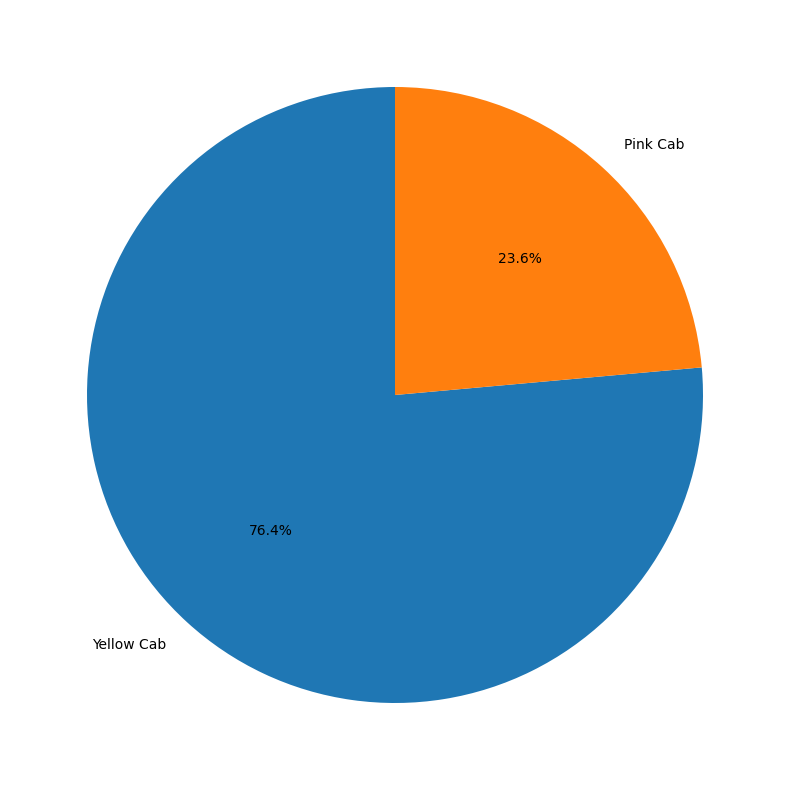

In [164]:
#pie chart to show pink vs yellow cab users
plt.figure(figsize=(10,10))
plt.pie(cab_transaction_customer_city['Company'].value_counts(), labels=cab_transaction_customer_city['Company'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.show()


Conclusion : 76.4% of the users use Yellow Cab and 23.6% of the users use Pink Cab


HYPOTHESIS TESTING:
1. The Male to Female ratio of Cab users is close to 50/50
2. Both Male and Female use Yellow taxis more than Pink Taxis since 

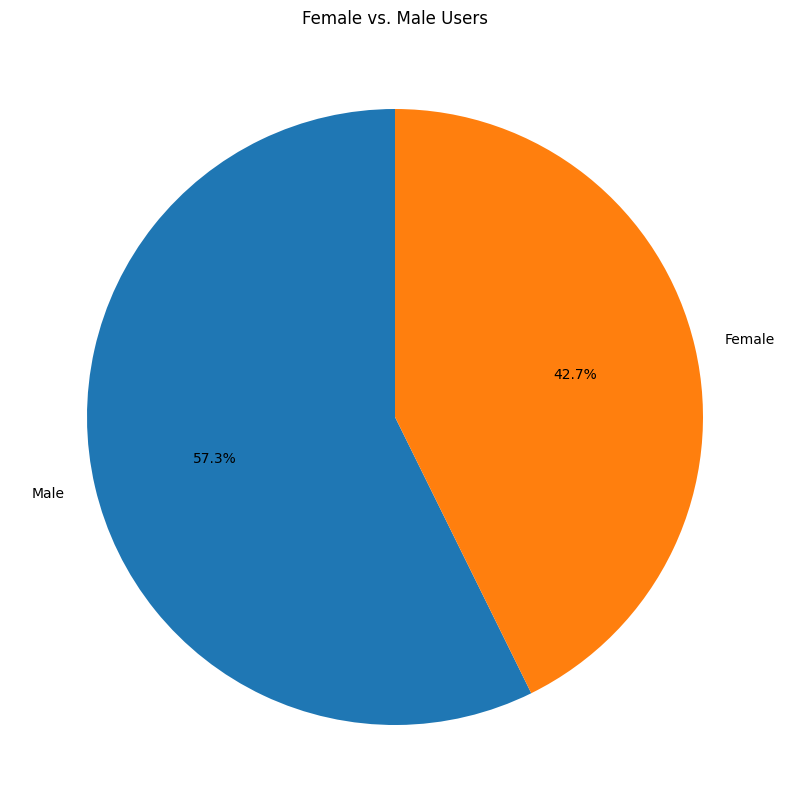

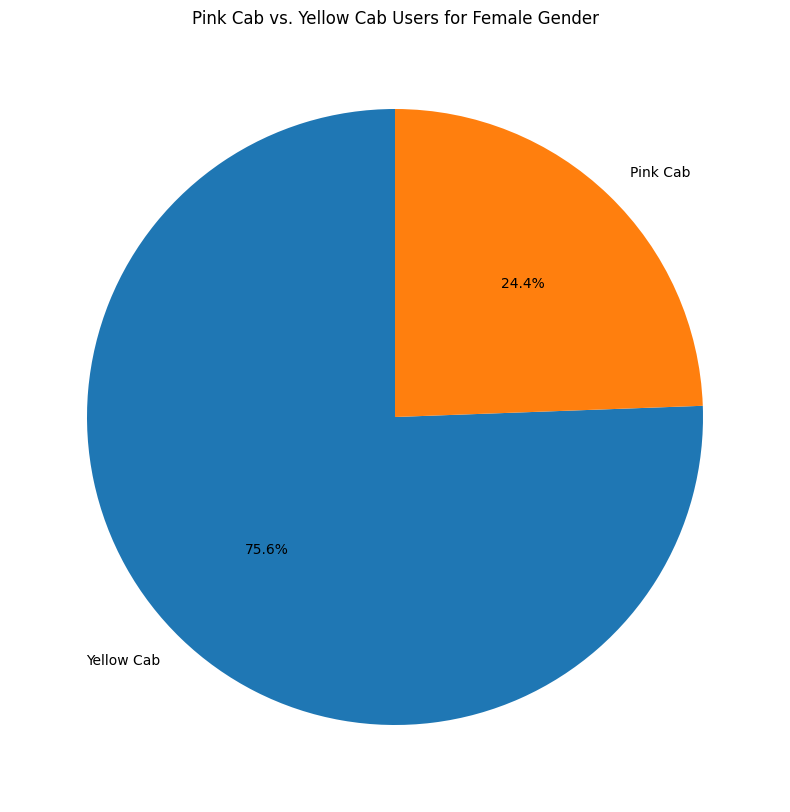

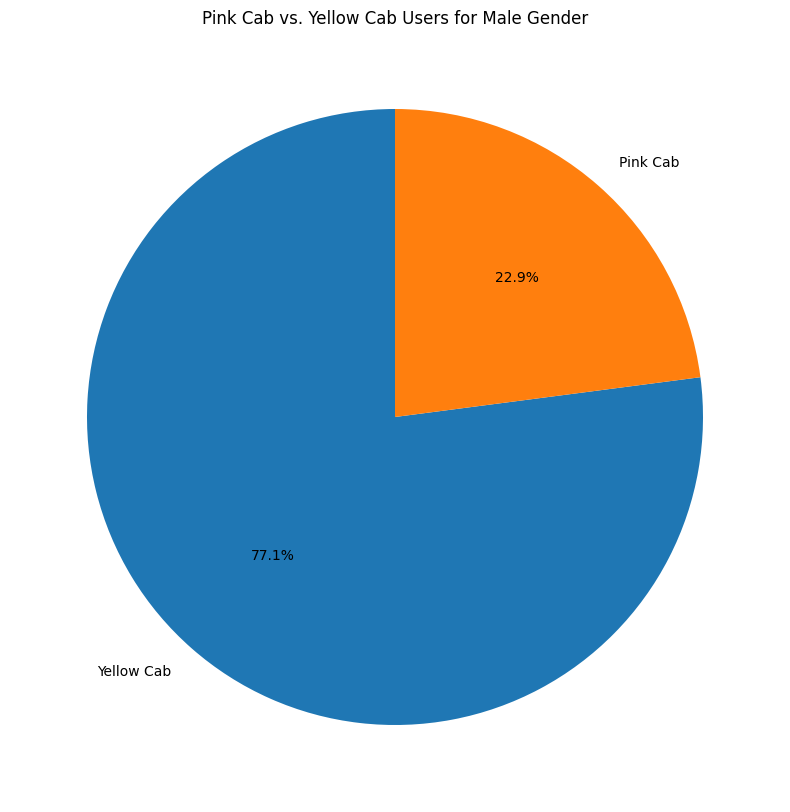

In [165]:
##pie chart to show cab users based on gender
plt.figure(figsize=(10,10))
plt.pie(cab_transaction_customer_city['Gender'].value_counts(), labels=cab_transaction_customer_city['Gender'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Female vs. Male Users')
plt.show()


#pie chart to pink cab users vs yellow cab users for female gender
female_data = cab_transaction_customer_city[cab_transaction_customer_city['Gender'] == 'Female']

plt.figure(figsize=(10, 10))
plt.pie(female_data['Company'].value_counts(), labels=female_data['Company'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Pink Cab vs. Yellow Cab Users for Female Gender')
plt.show()


#pie chart to pink cab users vs yellow cab users for male gender
female_data = cab_transaction_customer_city[cab_transaction_customer_city['Gender'] == 'Male']

plt.figure(figsize=(10, 10))
plt.pie(female_data['Company'].value_counts(), labels=female_data['Company'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Pink Cab vs. Yellow Cab Users for Male Gender')
plt.show()

Conclusion: 
1. Percentage of male to female is 57% to 43% in terms of cab usage
2. percentage of female and male users who prefer yellow cabs to pink cabs is 77/75 to 23/25

HYPOTHESIS TESTING:
More the number of KMs travelled in a Cab, higher the taxi fare one has to pay (usually).

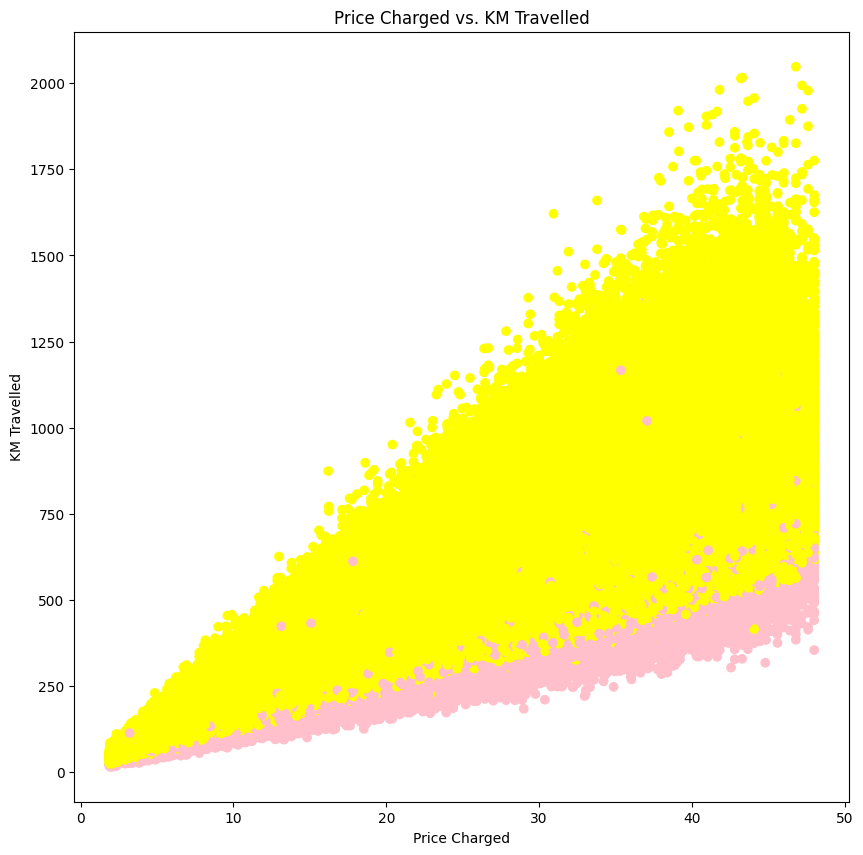

In [191]:
#scatter plot to show the correlation between price charged and kms travelled
#show yellow cab users and pink cab users in different colors
plt.figure(figsize=(10, 10))
plt.scatter( cab_transaction_customer_city['KM Travelled'], cab_transaction_customer_city['Price Charged'], c=cab_transaction_customer_city['Company'].apply(lambda x: 'yellow' if x == 'Yellow Cab' else 'pink'))
plt.xlabel('Price Charged')
plt.ylabel('KM Travelled')
plt.title('Price Charged vs. KM Travelled')
plt.show()


#Conclusion : There is a strong correlation between the price charged and kms travelled

HYPOTHESIS TESTING
1. Younger population between 20-35 use more Cabs
   Reasoning : More Cabs are used by adults in the age range of 20-35 to reach their destinations since a lot of them don't own cars or are moving from different, newer cities.

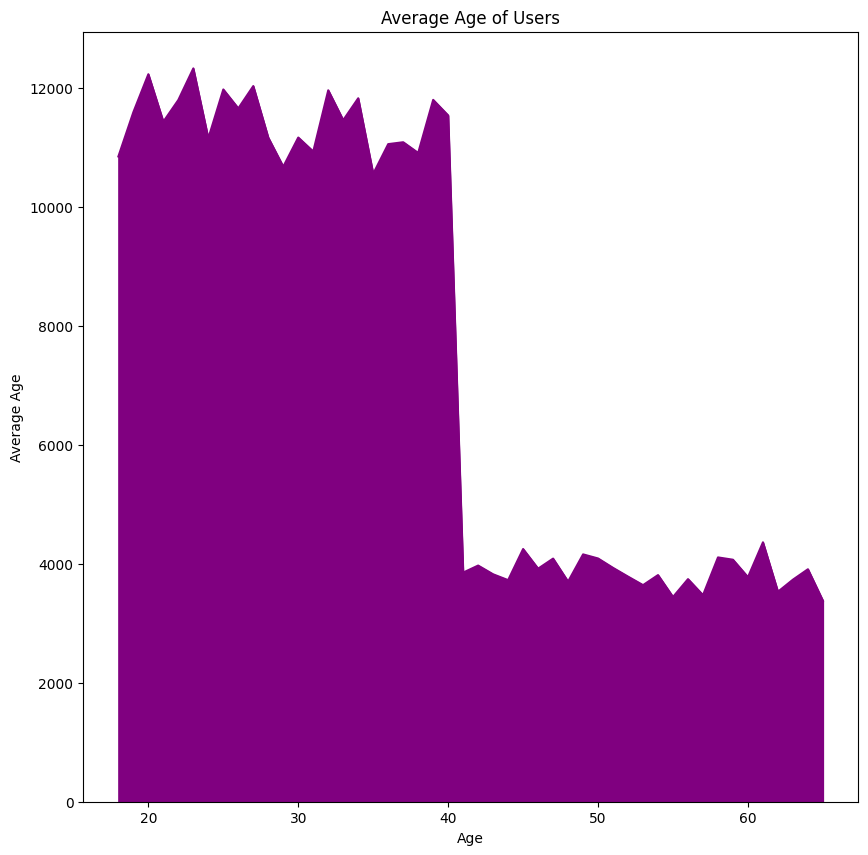

In [172]:
#show average age of users using area plot
#average age of users
average_age = cab_transaction_customer_city.groupby('Age')['Customer ID'].count()
average_age.head()

#plotting the area graph
plt.figure(figsize=(10, 10))
average_age.plot(kind='area', color='purple')
plt.xlabel('Age')
plt.ylabel('Average Age')
plt.title('Average Age of Users')
plt.show()

Conclusion: The number of people who take Cabs is much higher in the Age range of 20-40 according to the Graph above 

HYPOTHESIS TESTING
1. Profits for cab companies will be much higher in densely populated cities with higher cost of living as they are able to afford more
2. Profits will be higher for Yellow Cabs over Pink Cabs since there are a lot more Yellow cabs comared to Pink cabs in any given city at any give time of the year

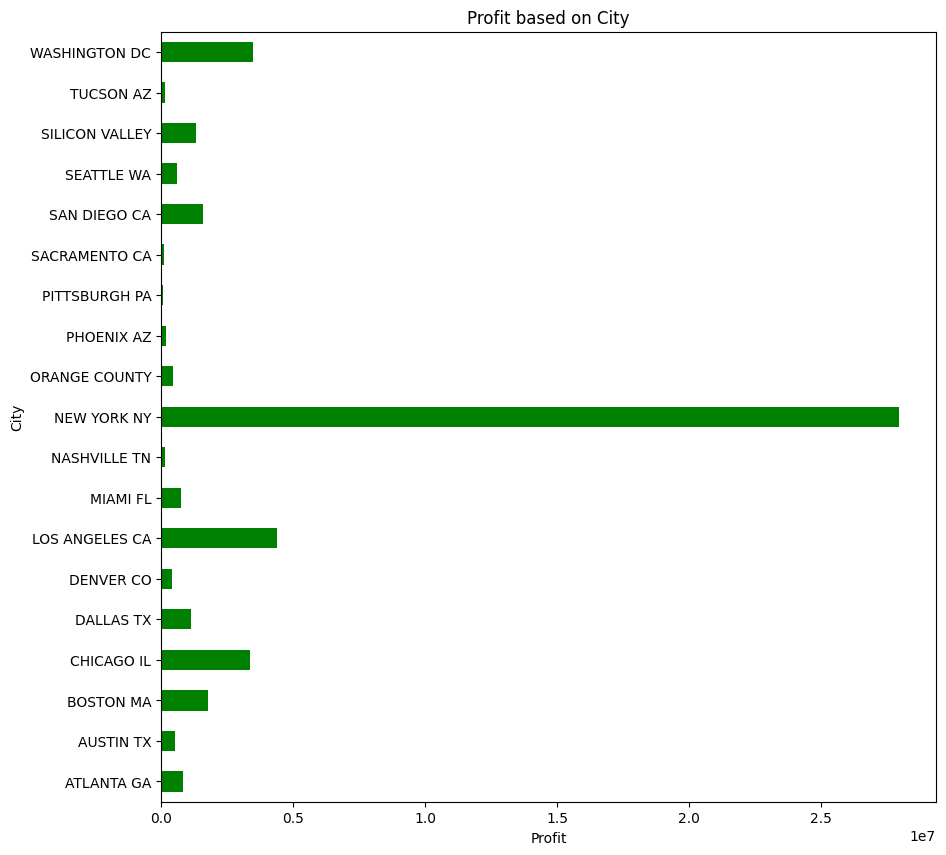

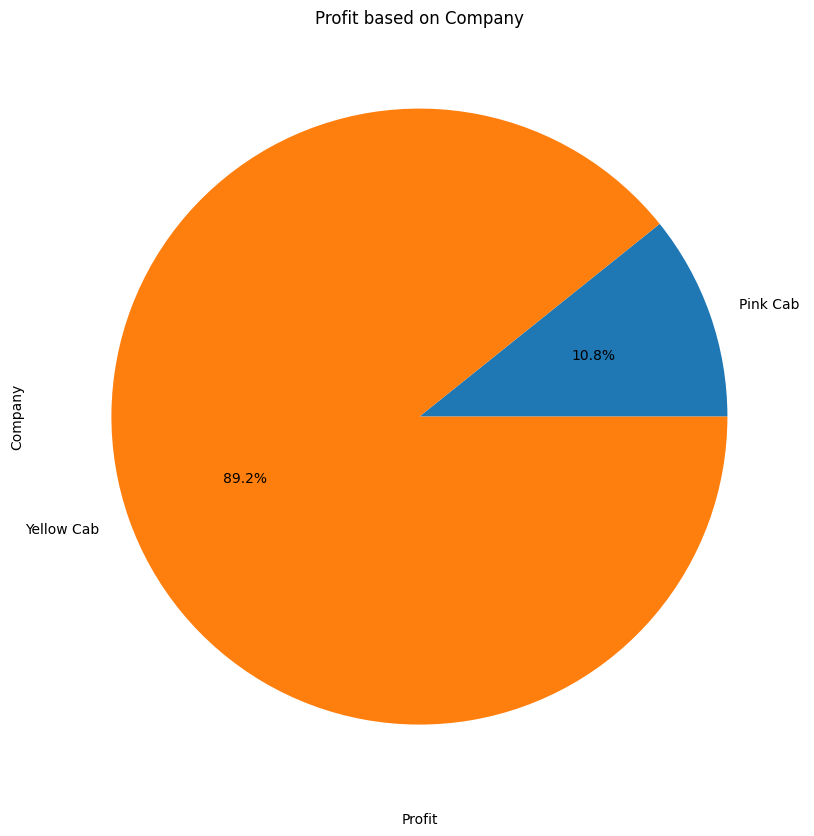

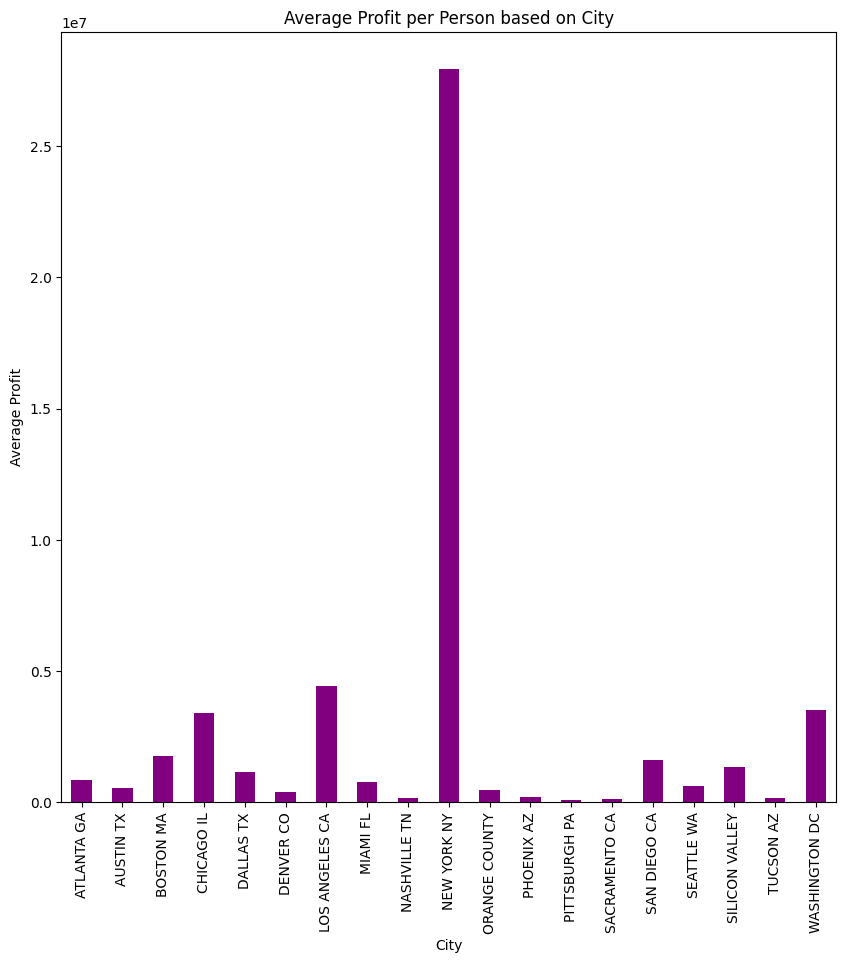

In [182]:
#add profit column to the dataset 
cab_transaction_customer_city['Profit'] = cab_transaction_customer_city['Price Charged'] - cab_transaction_customer_city['Cost of Trip']
cab_transaction_customer_city.head()

#make a visual horizontal histogram graph to show the profit of the company based on each city
#profit based on city
profit_city = cab_transaction_customer_city.groupby('City')['Profit'].sum()
profit_city.head()

#plotting the horizontal histogram chart
plt.figure(figsize=(10, 10))
profit_city.plot(kind='barh', color='green')
plt.xlabel('Profit')
plt.ylabel('City')
plt.title('Profit based on City')
plt.show()


#make a visual pie graph to show the profit of the company based on each company
#profit based on company
profit_company = cab_transaction_customer_city.groupby('Company')['Profit'].sum()
profit_company.head()

#plotting the pie chart
plt.figure(figsize=(10, 10))
profit_company.plot(kind='pie', autopct='%1.1f%%')
plt.xlabel('Profit')
plt.ylabel('Company')
plt.title('Profit based on Company')
plt.show()


#histogram to show average profit per person based on each city
#average profit per person based on city

average_profit_city = cab_transaction_customer_city.groupby('City')['Profit'].sum()
average_profit_city.head()

#plotting the histogram chart
plt.figure(figsize=(10, 10))
average_profit_city.plot(kind='bar', color='PURPLE')
plt.xlabel('City')
plt.ylabel('Average Profit')
plt.title('Average Profit per Person based on City')
plt.show()



Conclusion : Highest profit is in New York City and lowest profit is in Springfield

Conclusion : Highest profit is in Pink Cab and lowest profit is in Yellow Cab

HYPOTHESIS TESTING
1. More Profits during the November - February
   Reasoning : More Cabs are used during Winter to reach work, airports, parks, restaurants as it is snows and is very cold during Winter months of December- January

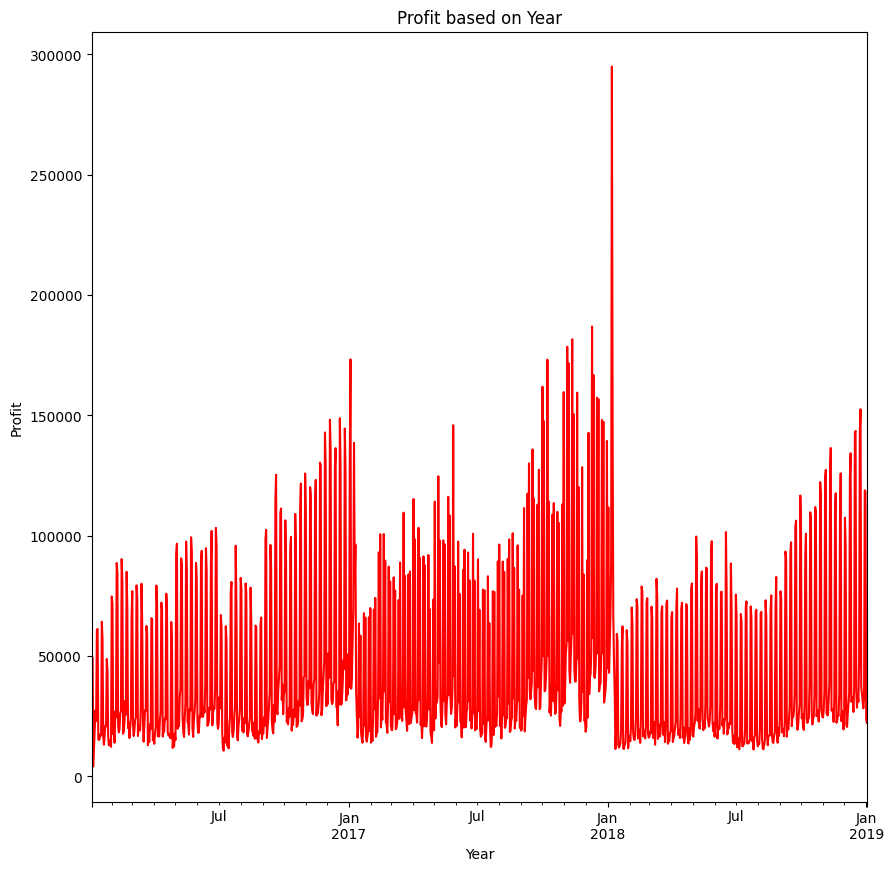

In [170]:
#line graph to show the profit of the company based on each year from 2016 to 2018
#profit based on year
profit_year = cab_transaction_customer_city.groupby('Date of Travel')['Profit'].sum()
profit_year.head()

#plotting the line graph
plt.figure(figsize=(10, 10))
profit_year.plot(kind='line', color='red')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.title('Profit based on Year')
plt.show()


Conclusion : Highest profit is in 2018 and lowest profit is in 2016
Conclusion : Profit is highest during the months  of December and January and lowest during the month of February


HYPOTHESIS TESTING
1. Yellow Cab profits over Pink Cab in every city 
   Reasoning : More Yellow Cab seen overall on cities while doing transactions and rides in all cities therefore consequently more profits 

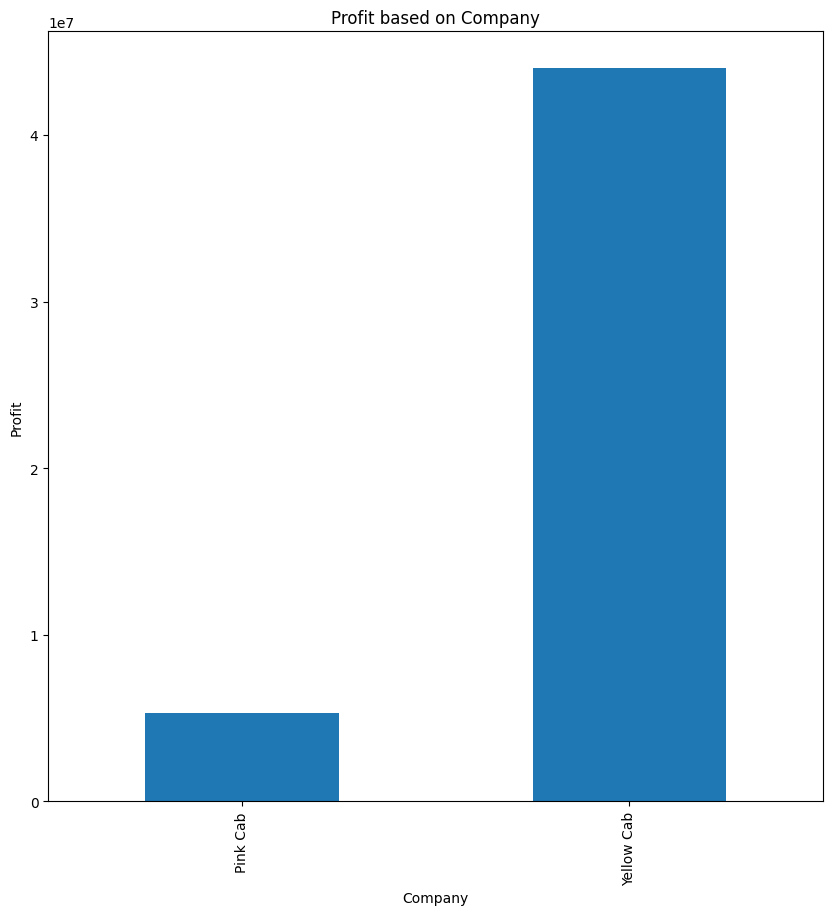

<Figure size 1200x800 with 0 Axes>

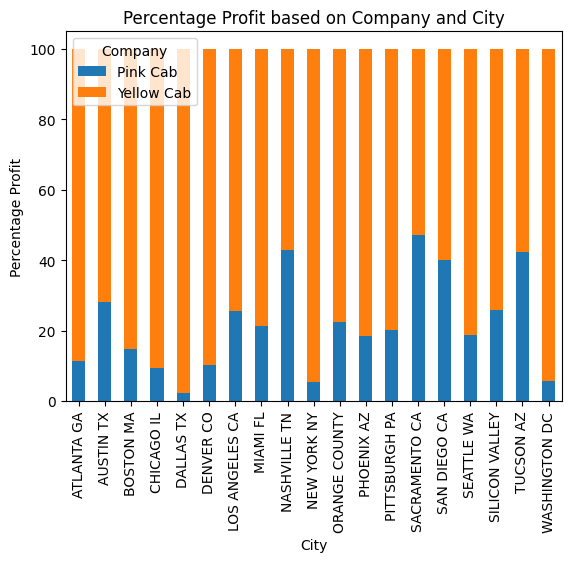

In [189]:
#show vertically stacked bar graph to show the % profit of pink company based on each city
#profit based on company 
profit_company = cab_transaction_customer_city.groupby('Company')['Profit'].sum()
profit_company.head()

#plotting the stacked bar graph
plt.figure(figsize=(10, 10))
profit_company.plot(kind='bar', stacked=True)
plt.xlabel('Company')
plt.ylabel('Profit')
plt.title('Profit based on Company')
plt.show()


#show vertically stacked bar graph to show yellow vs pink company based on each city
#profit based on city

total_profit_city = cab_transaction_customer_city.groupby('City')['Profit'].transform('sum')

# Calculate the percentage profit for each company based on each city
cab_transaction_customer_city['Percentage Profit'] = (cab_transaction_customer_city['Profit'] / total_profit_city) * 100

# Pivot the data for stacked bar chart
pivot_df = cab_transaction_customer_city.pivot_table(
    index='City', columns='Company', values='Percentage Profit', aggfunc='sum', fill_value=0
)

# Plot the stacked bar graph
plt.figure(figsize=(12, 8))
pivot_df.plot(kind='bar', stacked=True)
plt.xlabel('City')
plt.ylabel('Percentage Profit')
plt.title('Percentage Profit based on Company and City')
plt.legend(title='Company', loc='upper left')
plt.show()



Conclusion: Highest profit in each city is in Yellow Cab and lowest profit in each city is in Pink Cab


HYPOTHESIS TESTING:

Gender and Payment method have no influence on the profit of companies

In [192]:
#show p-test to show that gender and profit are independent

from scipy.stats import ttest_ind

# Assuming 'Profit' is the column representing profits in your dataset
# group1 is the profits for one payment method, and group2 for the other payment method
group1 = cab_transaction_customer_city[cab_transaction_customer_city['Payment_Mode'] == 'Cash']['Profit']
group2 = cab_transaction_customer_city[cab_transaction_customer_city['Payment_Mode'] == 'Card']['Profit']

# Perform t-test
t_stat, p_value = ttest_ind(group1, group2, equal_var=True)

# Print results
print('t-statistics:', t_stat, '\np-value:', p_value)

# Interpret results
if p_value < 0.05:
    print("Reject Null Hypothesis (H0)")
else:
    print("Fail to reject Null Hypothesis (H0)")


t-statistics: 0.7630743349931721 
p-value: 0.4454195660215944
Fail to reject Null Hypothesis (H0)


Conclusion : Payment method DOES make a difference in terms of profit for the cab companies.

In [193]:
from scipy.stats import ttest_ind

# Assuming 'Profit' is the column representing profits in your dataset
# group1 is the profits for one gender, and group2 for the other gender
group1 = cab_transaction_customer_city[cab_transaction_customer_city['Gender'] == 'Male']['Profit']
group2 = cab_transaction_customer_city[cab_transaction_customer_city['Gender'] == 'Female']['Profit']

# Perform t-test
t_stat, p_value = ttest_ind(group1, group2, equal_var=True)

# Print results
print('t-statistics:', t_stat, '\np-value:', p_value)

# Interpret results
if p_value < 0.05:
    print("Reject Null Hypothesis (H0)")
else:
    print("Fail to reject Null Hypothesis (H0)")


t-statistics: 12.70131593950141 
p-value: 5.921884821314785e-37
Reject Null Hypothesis (H0)


Conclusion : Gender DOES NOT make a difference in terms of profit for the cab companies.